# K-Means Clustering

AIM: To predict the optimum number of clusters present in the iris dataset and represent them visually using the K-Means Clustering algorithm. 



In [24]:
#Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
#Importing the dataset

dataset = pd.read_csv('iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
X = dataset.iloc[:, [1, 2]].values #Sepal Length & Sepal Width columns are used for forming clusters

Determining the value of k:

The Elbow Method is one of the most popular methods to determine the optimal value of k, i.e. the optimal number of clusters the data should be divided into.

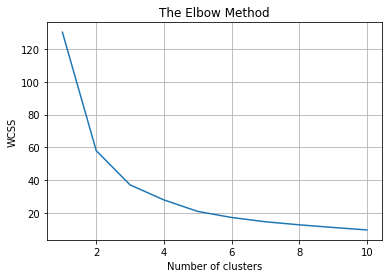

In [27]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

According to this method, we must select the value of k at the “elbow” i.e. the point after which the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From the graph we observe that k is 3. Hence, the optimal number of clusters for the given data is 3.

In [28]:
# Training the K-Means model on the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

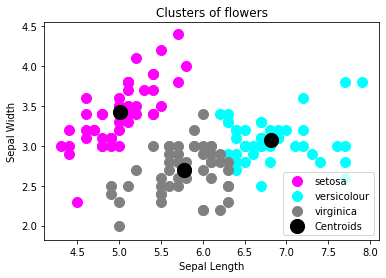

In [31]:
# Visualising the clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'magenta', label = 'setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'cyan', label = 'versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'gray', label = 'virginica')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')

plt.title('Clusters of flowers')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()